# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
#call API
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key
    
request = requests.get(url)
request_json=request.json()
#print(json.dumps(request_json, indent=4, sort_keys=True))

#create list, counter and set
counter = 0
set = 1
name = []
lat = []
lng = []
temp = []
clouds = []
wind = []
humidity = []
country = []
date = []

print('Beginning Data Retrieval')     
print('-----------------------------')

#loop through city to retreive data, printing the cities and number
for city in cities: 
    try:
        weatherdata = (requests.get(url + '&q=' + city)).json()
        name.append(weatherdata['name'])
        lat.append(weatherdata['coord']['lat'])
        lng.append(weatherdata['coord']['lon'])
        temp.append(weatherdata['main']['temp'])
        clouds.append(weatherdata['clouds']['all'])
        wind.append(weatherdata['wind']['speed'])
        humidity.append(weatherdata['main']['humidity'])
        country.append(weatherdata['sys']['country'])
        date.append(weatherdata['dt'])
       
        print(f'Processing Record {counter} of Set {set} | {city}')
        if counter > 49:
            counter = 0
            set += 1 
        counter = counter + 1
        
    except KeyError:
        print(f'City not found. Skipping...')
        

print('-----------------------------')
print('Data Retrieval Complete')      
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | arraial do cabo
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | sandnessjoen
Processing Record 4 of Set 1 | dangriga
Processing Record 5 of Set 1 | flinders
Processing Record 6 of Set 1 | rambha
Processing Record 7 of Set 1 | dimitrovgrad
Processing Record 8 of Set 1 | baykit
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | port alfred
City not found. Skipping...
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | virginia beach
Processing Record 14 of Set 1 | fez
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | lompoc
Processing Record 18 of Set 1 | aconibe
Processing Record 19 of Set 1 | gamba
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | clyde river
Processi

Processing Record 35 of Set 4 | victoria point
Processing Record 36 of Set 4 | eureka
Processing Record 37 of Set 4 | masvingo
Processing Record 38 of Set 4 | klerksdorp
City not found. Skipping...
City not found. Skipping...
Processing Record 39 of Set 4 | nuuk
Processing Record 40 of Set 4 | qasigiannguit
Processing Record 41 of Set 4 | ilulissat
Processing Record 42 of Set 4 | chapais
Processing Record 43 of Set 4 | burley
Processing Record 44 of Set 4 | pevek
Processing Record 45 of Set 4 | raudeberg
Processing Record 46 of Set 4 | san cristobal
Processing Record 47 of Set 4 | bambanglipuro
Processing Record 48 of Set 4 | kimbe
Processing Record 49 of Set 4 | saldanha
Processing Record 50 of Set 4 | san vicente de canete
Processing Record 1 of Set 5 | ulverstone
Processing Record 2 of Set 5 | whyalla
Processing Record 3 of Set 5 | sacama
Processing Record 4 of Set 5 | vardo
Processing Record 5 of Set 5 | verkhniy baskunchak
Processing Record 6 of Set 5 | aitape
City not found. Skip

Processing Record 25 of Set 8 | xining
Processing Record 26 of Set 8 | mayo
Processing Record 27 of Set 8 | karpathos
Processing Record 28 of Set 8 | mezhdurechensk
Processing Record 29 of Set 8 | pecos
Processing Record 30 of Set 8 | karla
Processing Record 31 of Set 8 | magadan
Processing Record 32 of Set 8 | oistins
Processing Record 33 of Set 8 | hobyo
Processing Record 34 of Set 8 | nyaunglebin
Processing Record 35 of Set 8 | veraval
Processing Record 36 of Set 8 | troitskoye
Processing Record 37 of Set 8 | san jeronimo
Processing Record 38 of Set 8 | canutama
Processing Record 39 of Set 8 | vredendal
Processing Record 40 of Set 8 | biak
Processing Record 41 of Set 8 | rocky mountain house
Processing Record 42 of Set 8 | vestmannaeyjar
Processing Record 43 of Set 8 | bilibino
Processing Record 44 of Set 8 | lynn haven
Processing Record 45 of Set 8 | mujiayingzi
Processing Record 46 of Set 8 | ust-ishim
Processing Record 47 of Set 8 | vallenar
City not found. Skipping...
Processing

Processing Record 13 of Set 12 | saint-georges
Processing Record 14 of Set 12 | pelotas
Processing Record 15 of Set 12 | chenghai
Processing Record 16 of Set 12 | zaraza
Processing Record 17 of Set 12 | arrecife
Processing Record 18 of Set 12 | bom jardim
Processing Record 19 of Set 12 | bubaque
Processing Record 20 of Set 12 | maragogi
Processing Record 21 of Set 12 | fershampenuaz
Processing Record 22 of Set 12 | silifke
Processing Record 23 of Set 12 | samfya
Processing Record 24 of Set 12 | makarov
City not found. Skipping...
Processing Record 25 of Set 12 | zacatepec
Processing Record 26 of Set 12 | mikhaylovskoye
Processing Record 27 of Set 12 | kafue
Processing Record 28 of Set 12 | iracoubo
Processing Record 29 of Set 12 | sulangan
Processing Record 30 of Set 12 | rawson
Processing Record 31 of Set 12 | vostok
Processing Record 32 of Set 12 | north branch
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
#Create a dataframe with required items
weatherdataDF = pd.DataFrame({'City': name,
                            'Latitude': lat,
                            'Longitude': lng,
                            'Temperature': temp,
                            'Cloudiness': clouds,
                            'Wind Speed': wind,
                            'Humidity': humidity,
                            'Country': country,
                            'Date': date})

#Save dataframe as csv
pd.DataFrame.to_csv(weatherdataDF, 'weatherdata.csv')

#print dataframe
weatherdataDF.head(10)

,City,Latitude,Longitude,Temperature,Cloudiness,Wind Speed,Humidity,Country,Date
0,Arraial do Cabo,-22.97,-42.03,77.00,90,3.36,94,BR,1604012576
1,Rikitea,-23.12,-134.97,75.11,54,11.03,76,PF,1604012626
2,Bredasdorp,-34.53,20.04,50.00,3,6.93,66,ZA,1604012638
3,Sandnessjøen,66.02,12.63,39.25,40,5.82,80,NO,1604012737
4,Stann Creek Town,16.97,-88.23,85.37,20,9.17,74,BZ,1604012725
5,Flinders,-34.58,150.86,68.00,41,1.01,74,AU,1604012737
6,Rambha,19.52,85.10,72.81,75,5.99,64,IN,1604012738
7,Dimitrovgrad,54.21,49.62,30.20,8,4.47,92,RU,1604012458
8,Baykit,61.67,96.37,11.73,100,1.86,92,RU,1604012738
9,Puerto Ayora,-0.74,-90.35,70.00,85,5.01,90,EC,1604012645


In [34]:
weatherdataDF.describe()

,Latitude,Longitude,Temperature,Cloudiness,Wind Speed,Humidity,Date
count,583.000000,583.000000,583.000000,583.000000,583.00000,583.000000,5.830000e+02
mean,20.028645,18.084923,56.589554,52.576329,7.79434,74.837050,1.604013e+09
std,33.820433,89.226685,22.166405,39.203504,5.58014,19.728201,9.061614e+01
min,-54.800000,-175.200000,-10.190000,0.000000,0.40000,1.000000,1.604012e+09
25%,-9.045000,-59.870000,42.800000,8.500000,3.36000,67.000000,1.604013e+09
50%,25.210000,20.870000,61.390000,64.000000,6.58000,79.000000,1.604013e+09
75%,48.660000,90.930000,75.285000,90.000000,10.29000,89.000000,1.604013e+09
max,78.220000,179.320000,93.200000,100.000000,28.86000,100.000000,1.604013e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# First filter out those rows which 
# does not contain any data 

clean_weatherDF= weatherdataDF.drop(weatherdataDF[weatherdataDF['Humidity'] > 100].index, inplace = False) 
clean_weatherDF.head(10)

,City,Latitude,Longitude,Temperature,Cloudiness,Wind Speed,Humidity,Country,Date
0,Arraial do Cabo,-22.97,-42.03,77.00,90,3.36,94,BR,1604012576
1,Rikitea,-23.12,-134.97,75.11,54,11.03,76,PF,1604012626
2,Bredasdorp,-34.53,20.04,50.00,3,6.93,66,ZA,1604012638
3,Sandnessjøen,66.02,12.63,39.25,40,5.82,80,NO,1604012737
4,Stann Creek Town,16.97,-88.23,85.37,20,9.17,74,BZ,1604012725
5,Flinders,-34.58,150.86,68.00,41,1.01,74,AU,1604012737
6,Rambha,19.52,85.10,72.81,75,5.99,64,IN,1604012738
7,Dimitrovgrad,54.21,49.62,30.20,8,4.47,92,RU,1604012458
8,Baykit,61.67,96.37,11.73,100,1.86,92,RU,1604012738
9,Puerto Ayora,-0.74,-90.35,70.00,85,5.01,90,EC,1604012645


In [36]:
clean_weatherDF.describe()

,Latitude,Longitude,Temperature,Cloudiness,Wind Speed,Humidity,Date
count,583.000000,583.000000,583.000000,583.000000,583.00000,583.000000,5.830000e+02
mean,20.028645,18.084923,56.589554,52.576329,7.79434,74.837050,1.604013e+09
std,33.820433,89.226685,22.166405,39.203504,5.58014,19.728201,9.061614e+01
min,-54.800000,-175.200000,-10.190000,0.000000,0.40000,1.000000,1.604012e+09
25%,-9.045000,-59.870000,42.800000,8.500000,3.36000,67.000000,1.604013e+09
50%,25.210000,20.870000,61.390000,64.000000,6.58000,79.000000,1.604013e+09
75%,48.660000,90.930000,75.285000,90.000000,10.29000,89.000000,1.604013e+09
max,78.220000,179.320000,93.200000,100.000000,28.86000,100.000000,1.604013e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

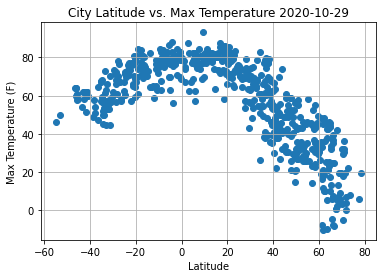

In [37]:
#Plot latitude vs temperature and save as .png
plt.scatter(clean_weatherDF['Latitude'], clean_weatherDF['Temperature'])

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f'City Latitude vs. Max Temperature {weatherDate}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.savefig('latTemp.png')

#The scatter plot is showing us what the maximum temperature (F) is depending on the latitutude coordinates. 
#I used matplotlib to visualize this data from my dataframe.

## Latitude vs. Humidity Plot

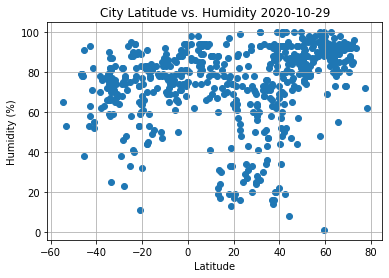

In [38]:
plt.scatter(clean_weatherDF['Latitude'], clean_weatherDF['Humidity'])

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f'City Latitude vs. Humidity {weatherDate}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('latHumid.png')

#The scatter plot is showing us what the humidity % is depending on the latitutude coordinates. 
#I used matplotlib to visualize this data from my dataframe.

## Latitude vs. Cloudiness Plot

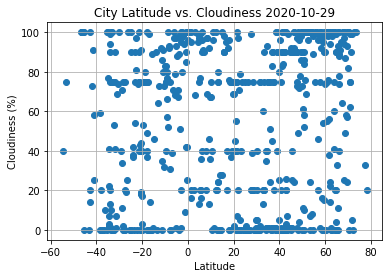

In [39]:
plt.scatter(clean_weatherDF['Latitude'], clean_weatherDF['Cloudiness'])

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f'City Latitude vs. Cloudiness {weatherDate}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('latCloud.png')

#The scatter plot is showing us what the cloudiness % is depending on the latitutude coordinates. 
#I used matplotlib to visualize this data from my dataframe.

## Latitude vs. Wind Speed Plot

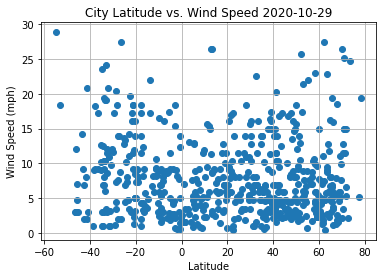

In [40]:
plt.scatter(clean_weatherDF['Latitude'], clean_weatherDF['Wind Speed'])

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f'City Latitude vs. Wind Speed {weatherDate}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('latWind.png')

#The scatter plot is showing us what the wind speed (mph) is depending on the latitutude coordinates. 
#I used matplotlib to visualize this data from my dataframe.

## Linear Regression

In [41]:
#find northern and southern hemisphere through .loc
northernhem = clean_weatherDF.loc[clean_weatherDF['Latitude'] >= 0]
southernhem = clean_weatherDF.loc[clean_weatherDF['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8591181620333618


Text(10, 15, 'y=-1.04x+92.24')

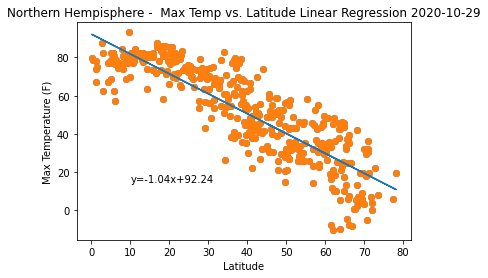

In [42]:
xvalue = northernhem["Latitude"]
yvalue = northernhem["Temperature"]
plt.scatter(xvalue, yvalue)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)

# Get regression values
regressionvalue = xvalue * slope + intercept
print(f'The r-value is {rvalue}')
line = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue)
plt.plot(xvalue, regressionvalue)

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')

plt.title(f'Northern Hempisphere -  Max Temp vs. Latitude Linear Regression {weatherDate}')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line, (10,15))

#The scatter plot is showing us what the maximum temperature (F) is depending on the latitutude coordinates in the Northern hempishere. 
#The r-value shows us there is a strong negative correlation between the two variables.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7264035698407312


Text(-20, 50, 'y=0.57x+81.07')

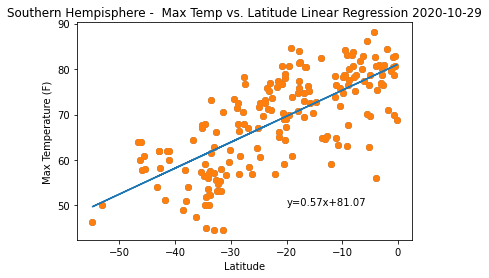

In [43]:
xvalue = southernhem["Latitude"]
yvalue = southernhem["Temperature"]
plt.scatter(xvalue, yvalue)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)

# Get regression values
regressionvalue = xvalue * slope + intercept
print(f'The r-value is {rvalue}')
line = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue)
plt.plot(xvalue, regressionvalue)

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')

plt.title(f'Southern Hempisphere -  Max Temp vs. Latitude Linear Regression {weatherDate}')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line, (-20,50))

#The scatter plot is showing us what the maximum temperature is depending on the latitutude coordinates in the Southern hempishere. 
#The r-value shows us there is a strong positive correlation between the two variables. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.30652966014286637


Text(50, 15, 'y=0.33x+62.87')

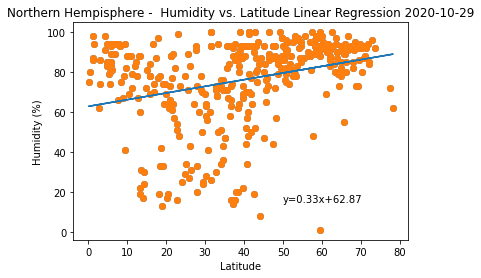

In [44]:
xvalue = northernhem["Latitude"]
yvalue = northernhem["Humidity"]
plt.scatter(xvalue, yvalue)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)

# Get regression values
regressionvalue = xvalue * slope + intercept
print(f'The r-value is {rvalue}')
line = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue)
plt.plot(xvalue, regressionvalue)

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')

plt.title(f'Northern Hempisphere -  Humidity vs. Latitude Linear Regression {weatherDate}')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line, (50,15))

#The scatter plot is showing us what the humidity % is depending on the latitutude coordinates in the Northern hempishere. 
#The r-value shows us there is a weak positive correlation between the two variables. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.20029775177313627


Text(-50, 20, 'y=0.23x+76.84')

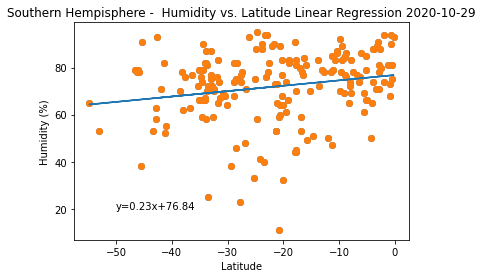

In [45]:
xvalue = southernhem["Latitude"]
yvalue = southernhem["Humidity"]
plt.scatter(xvalue, yvalue)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)

# Get regression values
regressionvalue = xvalue * slope + intercept
print(f'The r-value is {rvalue}')
line = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue)
plt.plot(xvalue, regressionvalue)

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')

plt.title(f'Southern Hempisphere -  Humidity vs. Latitude Linear Regression {weatherDate}')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line, (-50,20))

#The scatter plot is showing us what the humidity % is depending on the latitutude coordinates in the Southern hempishere. 
#The r-value shows us there is a hardly a correlation between the two variables.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.14054173757019725


Text(65, 25, 'y=0.28x+41.48')

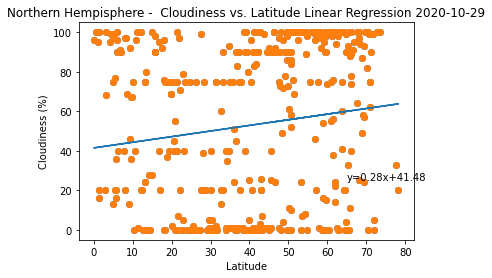

In [46]:
xvalue = northernhem["Latitude"]
yvalue = northernhem["Cloudiness"]
plt.scatter(xvalue, yvalue)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)

# Get regression values
regressionvalue = xvalue * slope + intercept
print(f'The r-value is {rvalue}')
line = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue)
plt.plot(xvalue, regressionvalue)

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')

plt.title(f'Northern Hempisphere -  Cloudiness vs. Latitude Linear Regression {weatherDate}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line, (65,25))

#The scatter plot is showing us what the cloudiness % is depending on the latitutude coordinates in the Northern hempishere. 
#The r-value shows us there is a very weak positive correlation between the two variables, hardly any correlation. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.15374980025757454


Text(-50, 60, 'y=0.44x+61.47')

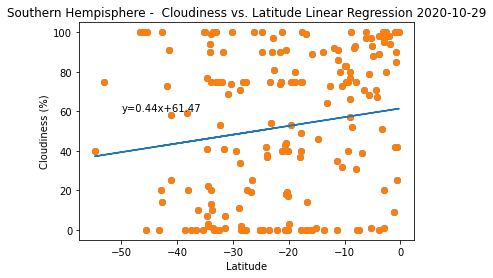

In [47]:
xvalue = southernhem["Latitude"]
yvalue = southernhem["Cloudiness"]
plt.scatter(xvalue, yvalue)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)

# Get regression values
regressionvalue = xvalue * slope + intercept
print(f'The r-value is {rvalue}')
line = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue)
plt.plot(xvalue, regressionvalue)

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')

plt.title(f'Southern Hempisphere -  Cloudiness vs. Latitude Linear Regression {weatherDate}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line, (-50,60))

#The scatter plot is showing us what the cloudiness % is depending on the latitutude coordinates in the Southern hempishere. 
#The r-value shows us there is a very weak positive correlation between the two variables. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.0799497858426234


Text(60, 25, 'y=0.02x+6.55')

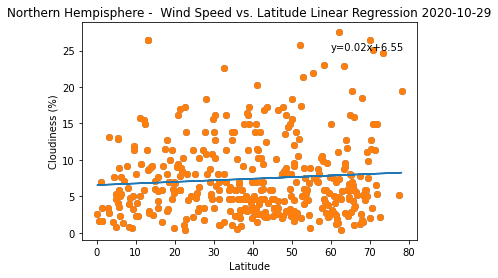

In [48]:
xvalue = northernhem["Latitude"]
yvalue = northernhem["Wind Speed"]
plt.scatter(xvalue, yvalue)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)

# Get regression values
regressionvalue = xvalue * slope + intercept
print(f'The r-value is {rvalue}')
line = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue)
plt.plot(xvalue, regressionvalue)

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')

plt.title(f'Northern Hempisphere -  Wind Speed vs. Latitude Linear Regression {weatherDate}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line, (60,25))

#The scatter plot is showing us what the wind speed (mph) is depending on the latitutude coordinates in the Northern hempishere. 
#The r-value shows us there is a very weak positive correlation between the two variables, hardly any correlation. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.21035240278945014


Text(-15, 25, 'y=-0.1x+6.52')

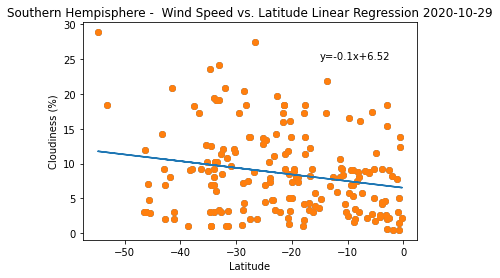

In [49]:
xvalue = southernhem["Latitude"]
yvalue = southernhem["Wind Speed"]
plt.scatter(xvalue, yvalue)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)

# Get regression values
regressionvalue = xvalue * slope + intercept
print(f'The r-value is {rvalue}')
line = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept,2))

plt.scatter(xvalue, yvalue)
plt.plot(xvalue, regressionvalue)

weatherDate = datetime.fromtimestamp(clean_weatherDF.loc[0,"Date"]).strftime('%Y-%m-%d')

plt.title(f'Southern Hempisphere -  Wind Speed vs. Latitude Linear Regression {weatherDate}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line, (-15,25))

#The scatter plot is showing us what the wind speed (mph) is depending on the latitutude coordinates in the Southern hempishere. 
#The r-value shows us there is a very weak negative correlation between the two variables, hardly any correlation. 